# 1. Importing Libraries and Data
We must first import libraries which contains the commands we need for analysis. Then we import the data and create dataframes. We will import data from the data_for_predictions.csv file.

In [2]:
# Import libraries.

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt

%matplotlib inline

sns.set(color_codes = True)

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import plot_tree

In [3]:
# Use the read_csv() command to import .csv files.
# Create a client_df dataframe for the client data and a price_df dataframe for the price data.

df = pd.read_csv(r'C:/Users/jwebe/OneDrive/Desktop/data_for_predictions.csv')

In [4]:
# By default, Jupyter Notebook displays 20 columns of a dataframe.
# Use the set_options() command to dispaly all columns.

pd.set_option('display.max_columns', None)

In [5]:
# Let's take a look at df.

df

,id,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,imp_cons,margin_net_pow_ele,nb_prod_act,net_margin,pow_max,churn,variance_1y_off_peak_var,variance_1y_peak_var,variance_1y_mid_peak_var,variance_1y_off_peak_fix,variance_1y_peak_fix,variance_1y_mid_peak_fix,variance_6m_off_peak_var,variance_6m_peak_var,variance_6m_mid_peak_var,variance_6m_off_peak_fix,variance_6m_peak_fix,variance_6m_mid_peak_fix,off_peak_price_difference_energy,off_peak_price_difference_power,energy_mean_diff_off_peak_peak,energy_mean_diff_peak_mid_peak,energy_mean_diff_off_peak_mid_peak,power_mean_diff_off_peak_peak,power_mean_diff_peak_mid_peak,power_mean_diff_off_peak_mid_peak,max_diff_peak_mid_peak_var,max_diff_off_peak_mid_peak_var,max_diff_off_peak_peak_fix,max_diff_off_peak_mid_peak_fix,tenure,months_activ,months_to_end,months_modif_prod,months_renewal,sales_channel_MISSING,sales_channel_ewpakwlliwisiwduibdlfmalxowmwpci,sales_channel_foosdfpfkusacimwkcsosbicdxkicaua,sales_channel_lmkebamcaaclubfxadlmueccxoimlema,sales_channel_usilxuppasemubllopkaafesmlibmsdf,origin_kamkkxfxxuwbdslkwifmmcsiusiuosws,origin_ldkssxwpmemidmecebumciepifcamkci,origin_lxidpiddsbxsbosboudacockeimpuepw
0,24011ae4ebbe3035111d65fa7c15bc57,0.000000,4.739944,0.000000,0.000000,0.0,0.444045,0.047073,0.040659,1.619163,1,0.000000,25.44,2,678.99,43.648,1,0.000061,2.627605e-05,4.402763e-04,1.102785e+00,49.550703,22.022535,0.000131,4.100838e-05,9.084737e-04,2.086294,99.530517,44.235794,0.020057,3.700961,0.024038,0.034219,0.058257,18.590255,7.450670,26.040925,0.085483,0.146033,44.266930,44.266930,3,31,5,2,6,0,0,1,0,0,0,0,1
1,d29c2c54acc38ff3c0614d0a653813dd,3.668479,0.000000,0.000000,2.280920,0.0,1.237292,0.059075,0.000000,1.656207,0,0.000000,16.38,1,18.89,13.800,0,0.000005,6.089453e-04,0.000000e+00,6.464779e-03,0.000000,0.000000,0.000003,1.217891e-03,0.000000e+00,0.009482,0.000000,0.000000,-0.003767,0.177779,0.142485,0.007124,0.149609,44.311375,0.000000,44.311375,0.085483,0.151367,44.444710,44.444710,7,77,8,77,4,1,0,0,0,0,1,0,0
2,764c75f661154dac3a6c254cd082ea7d,2.736397,0.000000,0.000000,1.689841,0.0,1.599009,0.066622,0.036589,1.656207,0,0.000000,28.60,1,6.60,13.856,0,0.000006,2.558511e-07,0.000000e+00,7.661891e-03,0.000000,0.000000,0.000004,9.450150e-08,0.000000e+00,0.000000,0.000000,0.000000,-0.004670,0.177779,0.082090,0.088421,0.170512,44.385450,0.000000,44.385450,0.089162,0.172468,44.444710,44.444710,6,69,3,69,8,0,0,1,0,0,1,0,0
3,bba03439a292a1e166f80264c16191cb,3.200029,0.000000,0.000000,2.382089,0.0,1.318689,0.059448,0.000000,1.656207,0,0.000000,30.22,1,25.46,13.200,0,0.000005,0.000000e+00,0.000000e+00,6.464721e-03,0.000000,0.000000,0.000003,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,-0.004547,0.177779,0.151210,0.000000,0.151210,44.400265,0.000000,44.400265,0.000000,0.153133,44.444710,44.444710,6,70,2,70,9,0,0,0,1,0,1,0,0
4,149d57cf92fc41cf94415803a877cb4b,3.646011,0.000000,2.721811,2.650065,0.0,2.122969,0.048014,0.041399,1.619163,0,1.726890,44.91,1,47.98,19.800,0,0.000015,3.552481e-06,2.522046e-06,5.428942e-03,0.001954,0.000869,0.000011,2.896760e-06,4.860000e-10,0.000000,0.000000,0.000000,-0.006192,0.162916,0.020536,0.030773,0.051309,16.275263,8.137629,24.412893,0.033743,0.055866,16.291555,24.437330,6,72,2,72,9,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14601,18463073fb097fc0ac5d3e040f356987,4.508812,4.680707,0.000000,3.667360,0.0,1.291591,0.056259,0.000000,1.656207,1,0.000000,27.88,2,381.77,15.000,0,0.000015,0.000000e+00,0.000000e+00,8.380216e-03,0.000000,0.000000,0.000003,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,-0.008653,0.177779,0.144124,0.000000,0.144124,44.370635,0.000000,44.370635,0.000000,0.148825,44.444710,44.444

# 2. Data Modelling
Data modeling is the process of converting raw data into insight using algorithms and other systems of equations. The machine learning model that we will use to predict churn is the Random Forest model. The Random Forest model is an algorithm that combines the output of multiple decision trees to reach a single decision.

## 2a. Data Sampling
Random Forest model is a supervised learning algorithm. Supervised learning algorithms requires training data to create the model. Once the model is created using the training data, the model is compared with the test data to determine if the model is overfitting, underfitting, or has good fit.

The first thing we need to do is to split our dataset into training and test data. Since both training and test data come from the same dataset, they should follow the same pattern even if the data in both sets are different. By creating a model using the training data and testing the model using the test data, we can determine how well the model can predict the pattern within the data.

In [8]:
# Make a copy of the data.
# It's a good idea to keep the original data intact in case you need the data in the original dataframe.
# Use the .copy() command to create a copy of the data.

train_df = df.copy()

# Separate target variable from independent variables.
# The target variable is the variable you are trying to predict (churn).
# The independant variables are the varibales you will use to predict the target variable (all variables except churn and id).

y = df['churn']
X = df.drop(columns=['id', 
                     'churn'])

# Use the .shape() command to show the number of rows and columns a variable contains.

print(X.shape)
print(y.shape)

(14606, 52)
(14606,)


In [9]:
# Create training and test data.
# The test_size the is % of the original data that will be used for test data.
# A typical % for test data is 20%-30%. We will use 25%.

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size = 0.25, 
                                                    random_state = 42)

# Use the .shape command to see the number of rows and columns for each x, y, train, and test variables.

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(10954, 52)
(10954,)
(3652, 52)
(3652,)


## 2b. Training the Model
To train the model, we need to create a Random Forest model using the training data. The model will use the training data, create decision trees, and will predict whether a customer will churn or not by finding and learning patterns within the training data.

In [11]:
# Use the RandomForestClassifier() command to create a random forest model.

model = RandomForestClassifier(n_estimators = 1000, 
                               random_state = 42)

# Use the .fit() command to fit the data into the model.
# The data that we will fit into the model will be the training data, both x_train and y_train.

fitted = model.fit(X_train, y_train)

## 2c. Testing
Now that we trained the Random Forest model, we will use the test data to test the model. We test the model by using the test data as inputs for the Random Forest model. We will then use a confusion matrix to determine the accuracy, precision, and recall for the model.

In [13]:
# Use the .predict() command to labels of the data values on the basis of the trained model.
# Use the test data (X_test) as input.

predictions = fitted.predict(X_test)

# Use the metrics.confusion() command to compute confusion matrix to evaluate the accuracy of a classification.
# Use the y_test variable as the true values.
# Use predictions as the predicted values.
# Use the .ravel() command to merge multiple arrays (tn, fp, fn, tp) to a single array.

tn, fp, fn, tp = metrics.confusion_matrix(y_test, predictions).ravel()

In [14]:
# Use the .value_counts() commant to count the number of different values in y_test.

y_test.value_counts()

churn
0    3286
1     366
Name: count, dtype: int64

In [15]:
## Use the print() command to print out the results of the confusion matrix.

print(f"True positives: {tp}")
print(f"False positives: {fp}")
print(f"True negatives: {tn}")
print(f"False negatives: {fn}\n")

print(f"Accuracy: {metrics.accuracy_score(y_test, predictions)}")
print(f"Precision: {metrics.precision_score(y_test, predictions)}")
print(f"Recall (Sensitivity): {metrics.recall_score(y_test, predictions)}")
print(f"F1: {metrics.f1_score(y_test, predictions)}")

True positives: 16
False positives: 3
True negatives: 3283
False negatives: 350

Accuracy: 0.9033406352683461
Precision: 0.8421052631578947
Recall (Sensitivity): 0.04371584699453552
F1: 0.08311688311688312


True Positives (TP) are events where the model predicted a positive value (a customer will churn) and the data supports the model's prediction. False Positives (FP) are events where the model predicts a positive value but the data does not support the prediction.

Similarly, True Negatives (TN) are events where the model predicts a negative value (a cusotmer will not churn) and the data supports the prediction. False Negatives (FN) are events where the model predicts a negative value but the data does noot support the prediction.

Accuracy is the overall accuracy of the model. It is calculated as TP + TN/TP + TN + FP + FN where TP + TN represents all the predictions that are correct and TP + TN + FP + FN represents all of the predictions.

Precision is the ability of the model to accurately predict positive values. It is calculated as TP/TP + FP where TP represents  the values that the model correctly predicts will have a positive value and TP + FP represents all the values that the model predicts will have a positive value, regardless of whether it is correct or incorrect.

Recall is the ability of the model to accurately detect positive values. It is calculated as TP/TP + FN where TP represents  the values that the model correctly predicts will have a positive value and TP + FN represents the actual number of positive values.

F1 represents how well the model can detect and accurately predict positive values. It is calculated as 2 * (Precision * Recall)/(Precision + Recall).

Our model has a high accuracy score of 90.33%. If the model predicts that a value will be positive (yes, a customer will churn) or negative (no, a customer will not churn), there is a 90.33% chance that the prediction is accurate.

Our model also has a high precision score of 84.21%. Accuracy represents how well the model is able to predict both positive and negative values, while precision represents how well the model is able to predict positive values. The model has predicted 19 positive values and 16 of the predicted values are true. This indicates that if the model predicts that a value is positive, there is a 84.21% chance that prediction is accurate.

However, our model has a very low recall score of 4.37%. Recall represents how well the model can detect positive values. There are a total of 366 values that are positive and the model was able to accurately predict 16 of them. This means that our model can only detect 4.37% of positive values.

Our model also has a very low F1 score. The F1 score represents how accurate the model is at predicting and detecting positive and negative values. A low F1 score indicated that either precision or recall is significantly lower than the other. Because the model has a high precision score and a low recall score, our F1 score is also low.

A model with high precision and low recall means that our model is more cautious in its predictions. While it may miss a substantial number of customers who will churn, it will be confident in its predictions when it deos predict that a customer will churn.

## 2d. Visualiziations
Now that we have created out RAndom Forest model, let's create visualizations so that we could better understand the model.

In [18]:
# Use the .predict() command to predict values using the values in the predictors variable.

predict_df = df[['id', 'churn']]
predict_df['prediction'] = fitted.predict(X)

predict_df.head()

C:\Users\jwebe\AppData\Local\Temp\ipykernel_3064\466340833.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predict_df['prediction'] = fitted.predict(X)


,id,churn,prediction
0,24011ae4ebbe3035111d65fa7c15bc57,1,0
1,d29c2c54acc38ff3c0614d0a653813dd,0,0
2,764c75f661154dac3a6c254cd082ea7d,0,0
3,bba03439a292a1e166f80264c16191cb,0,0
4,149d57cf92fc41cf94415803a877cb4b,0,0


The dataframe above is a sample of the predict_df dataframe. The predict_df dataframe shows the customer ID, whether the customer has churned or not, and what our Randm Forest model predicts. In the first row, the customer has churned but our model predicts that the customer has not churned.

Next, we will create a visualization of one decision tree that makes up our Random Forest model. Our model is made up of one thousand decision trees.

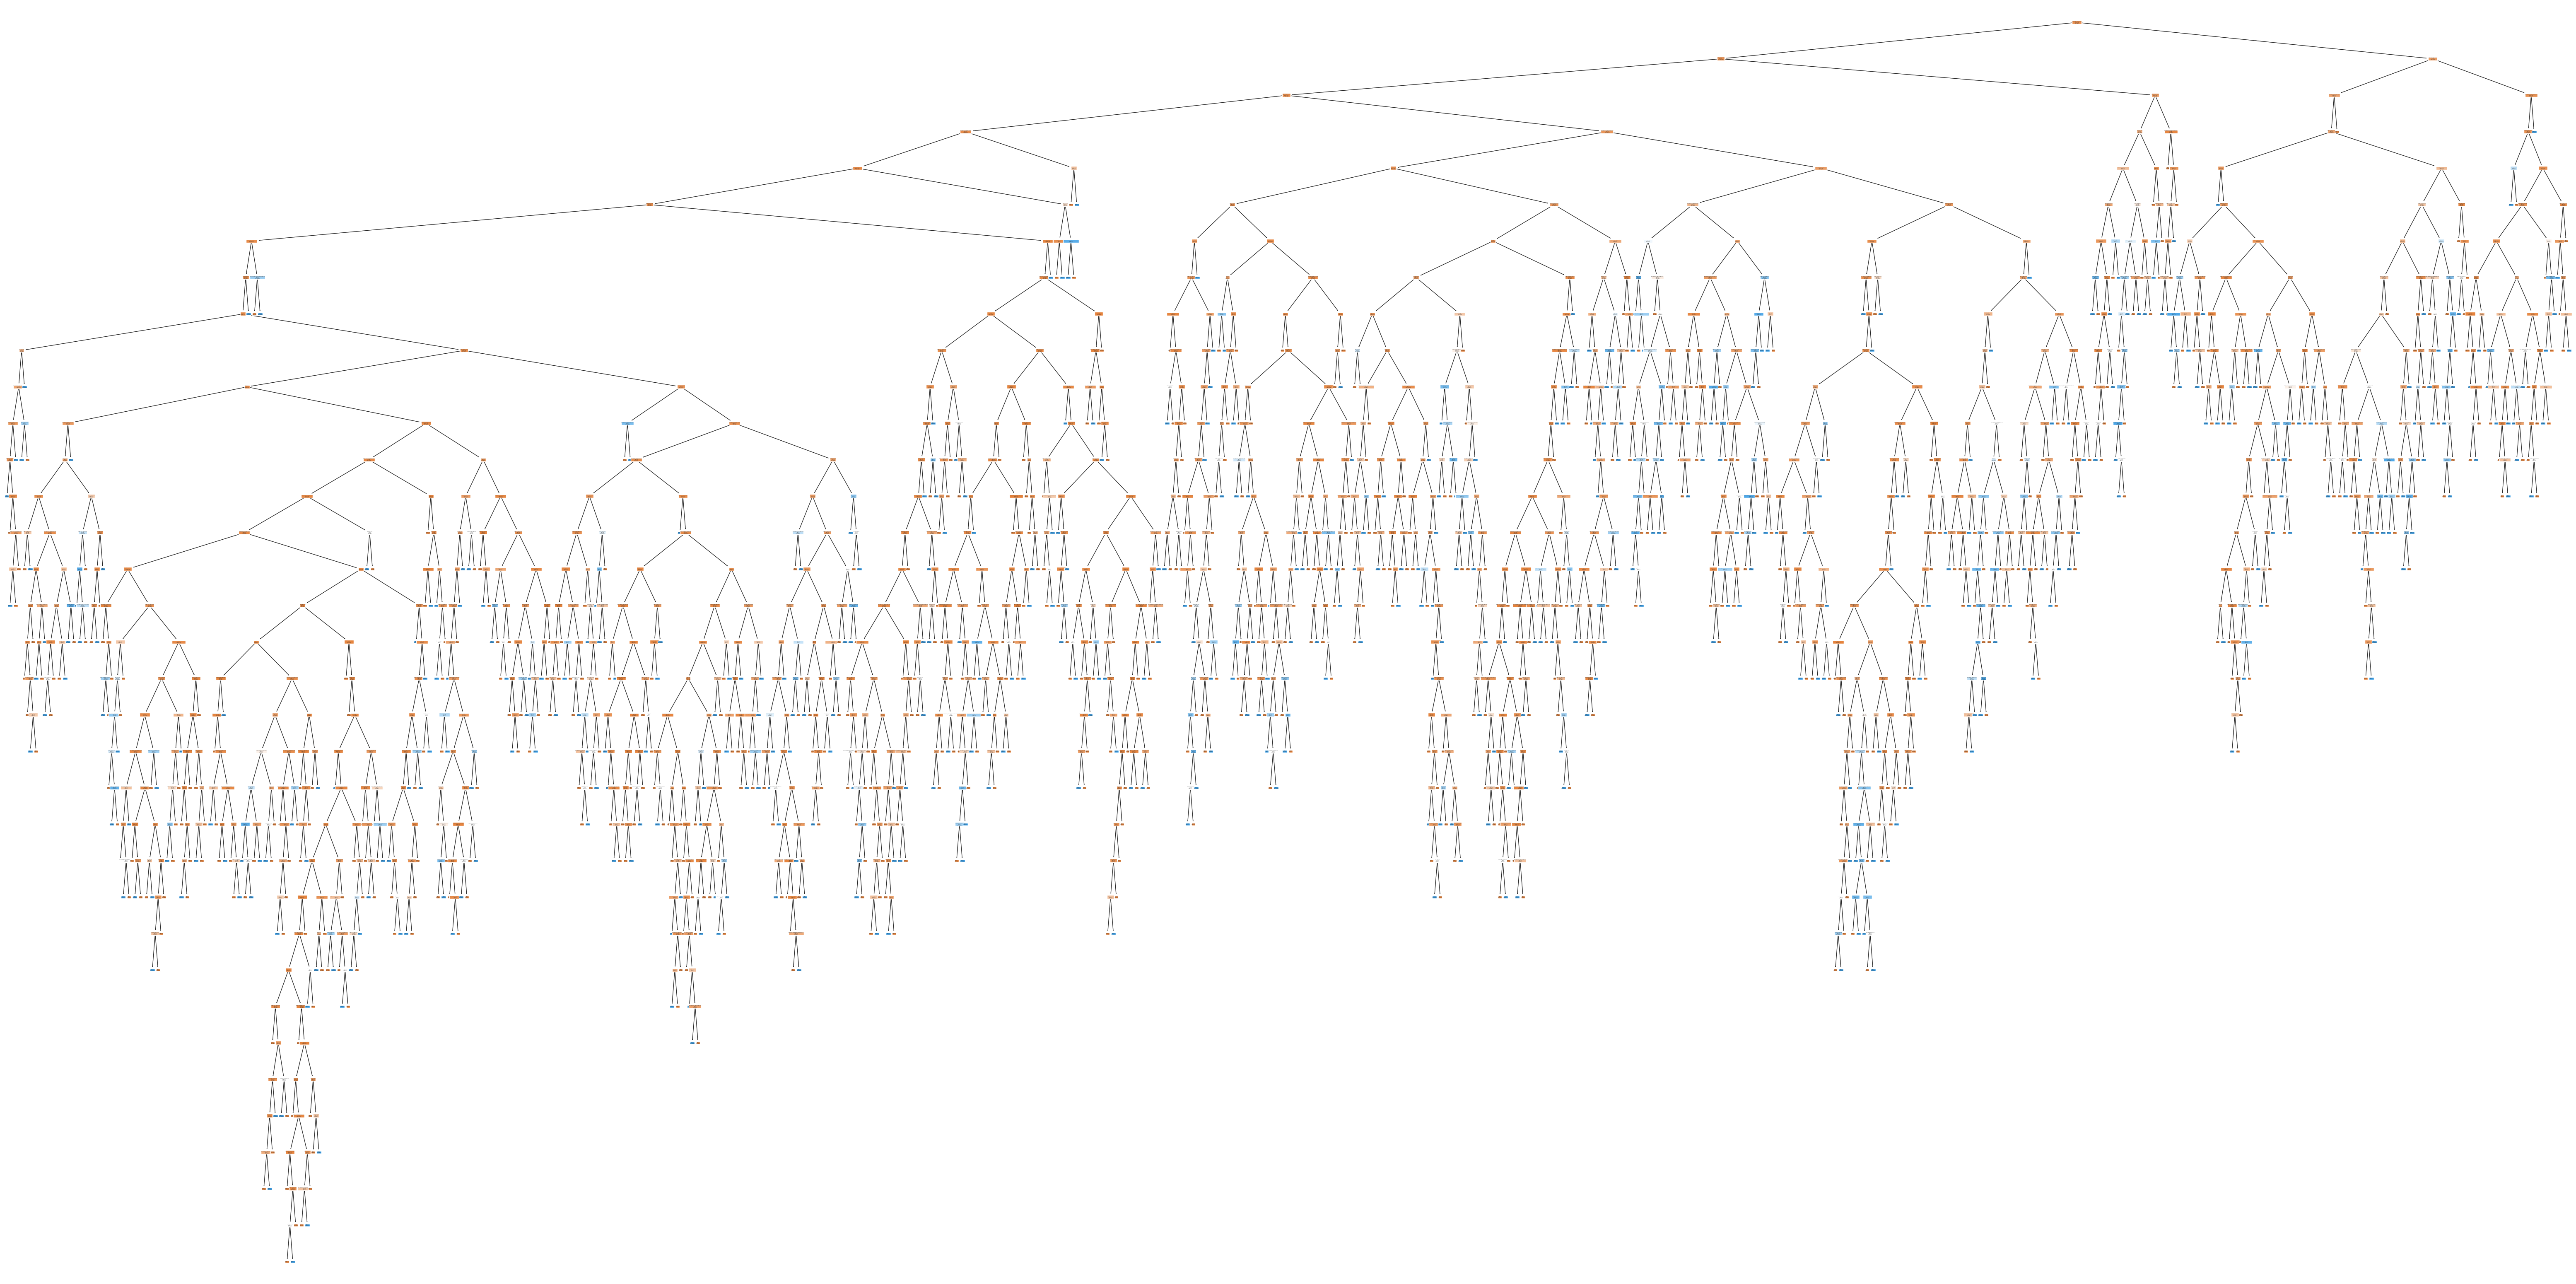

In [45]:
# Use the plot_tree() command to plot a decision tree.
# model.estimators[] is the tree you want to plot.
# feature_names is the name of the variables used to predict the independant variable.
# class_names is the name of the target classes.
# filled colors the nodes.

plt.figure(figsize=(80,40))
plot_tree(model.estimators_[0], feature_names = X.columns, class_names = ['Churn', "No Churn"],filled = True);
plt.show()

## 2f. Feature Importance
The data that we fed to our Random Forest model contains many features (columns). Some features have a bigger impact on how the Ramdom Forest model make predictions. We will determine which columns will have the greatest impact on the Random Forest model. A feature with an importance score of 1 indicates that only that feature is used to predict outcomes. A feature with an importance score of 0 indicates that the feature has no effect on the Random Forest model.

In [22]:
# Find the most important features that determine churn.
# Use the .feature_importances_ command to find the importance values of each feature.

fitted.feature_importances_

#Create an importance dataframe that displays the features and importance level.

feature_importance = pd.DataFrame({'Feature': X_train.columns, 
                                   'Importance': fitted.feature_importances_})

feature_importance.sort_values(by = 'Importance', 
                               ascending = False, 
                               inplace = True)

feature_importance

,Feature,Importance
11,margin_net_pow_ele,0.063732
0,cons_12m,0.059543
13,net_margin,0.058142
5,forecast_meter_rent_12m,0.057094
3,forecast_cons_12m,0.053655
2,cons_last_month,0.042092
14,pow_max,0.041214
10,imp_cons,0.037041
40,months_activ,0.036859
29,energy_mean_diff_off_peak_peak,0.035460


Let's create a bar chart showing the feature importance. To make the bar chart easier to read, let's arrange the bars in descending order based on importance.

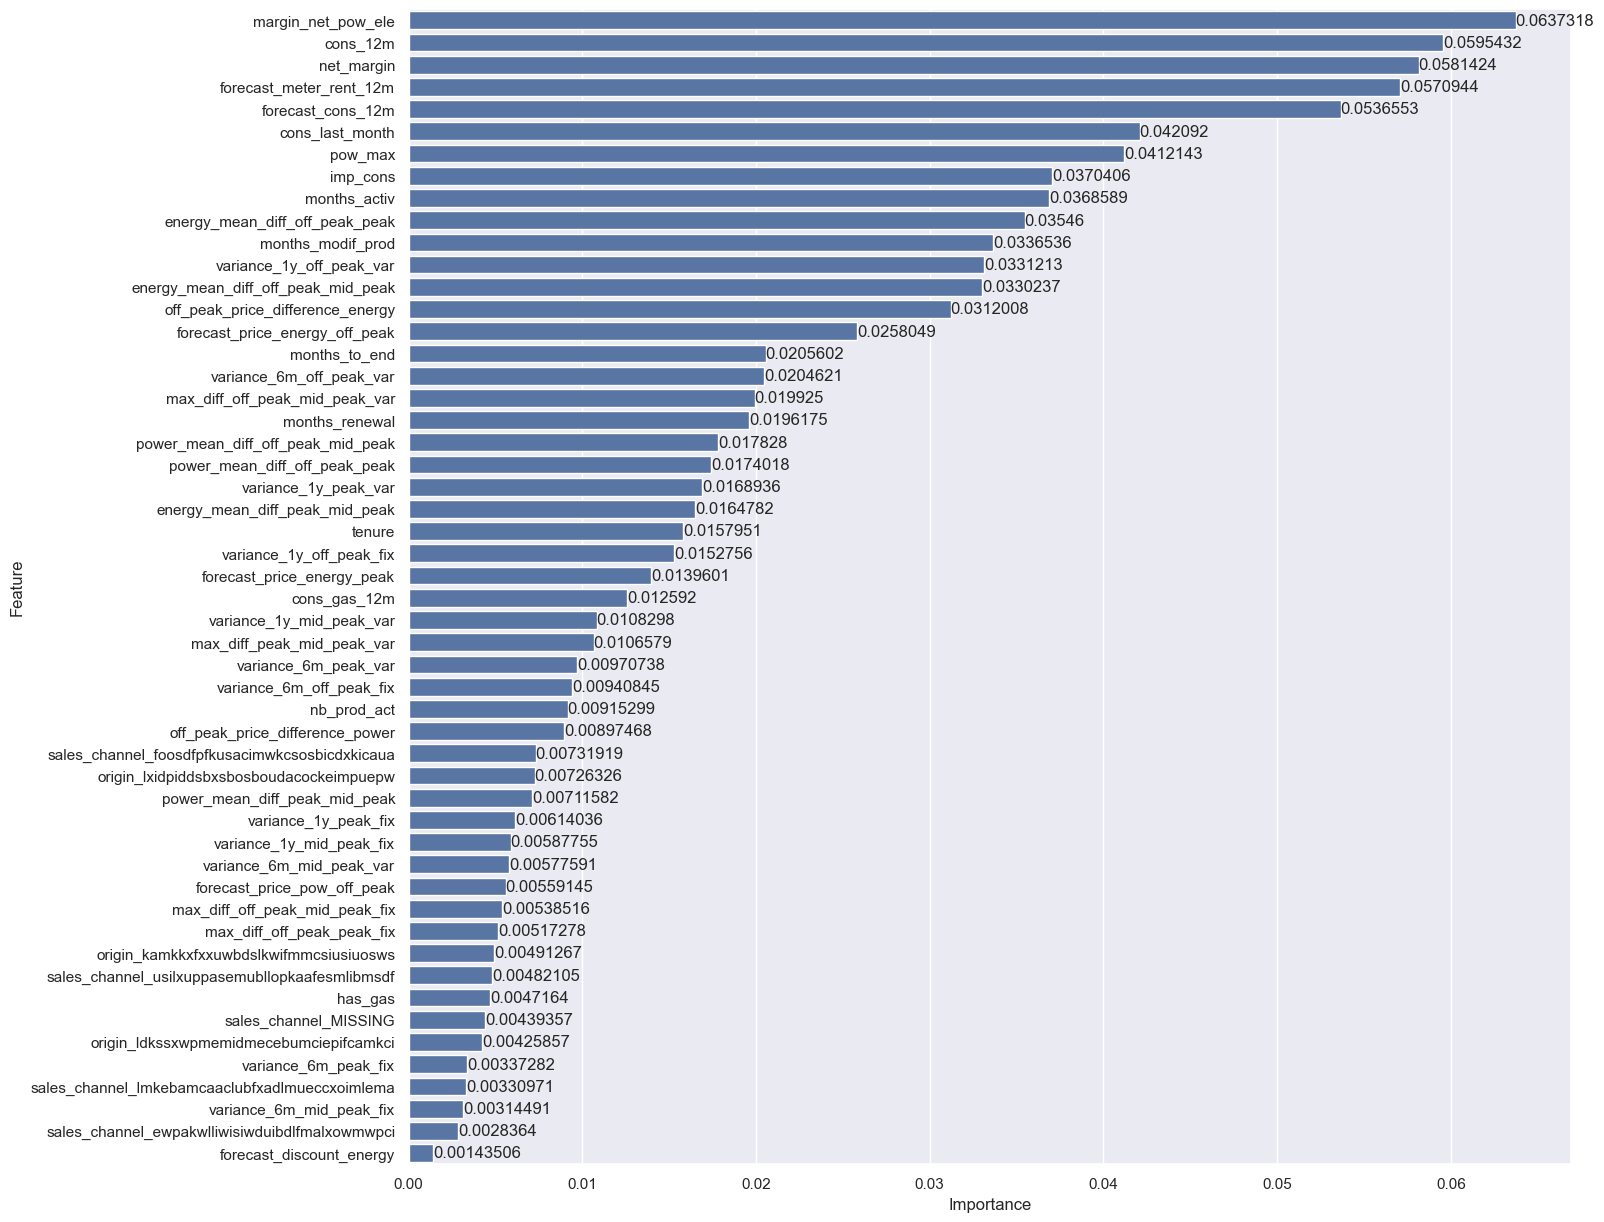

In [24]:
# Use the fig, ax = plt.subplots() command to create a set of subplots within one cell.
fig, ax = plt.subplots(1, 1, figsize=(15, 15))

# Use the sns.barplot() command to create a bar plot.

sns.barplot(data = feature_importance, 
            x = 'Importance', 
            y = 'Feature')

ax.bar_label(ax.containers[0])

plt.show()

The greatest driver for churn is the net margin on power subscription (0.064), followed by electricity consumption of the past 12 months (0.06), and total net margin (0.058).

Time is also an influential factor, such as the number of months a customer has been active (0.037), their tenure (0.016), and the number of months since they renewed their contract (0.02).

Features that are influential to churn tend to fall under power consumption and time. Price senitivity features (variance in prices, max difference in price) are scattered. Some price sensitivity features have a higher influence on churn, such as the price variance between off peak and peak time. Most sensitiviy features, however, have very low influence on churn.

This would suggest that our original hypothesis, that price senitivity is the main contributor for churn, is incorrect.